# Problem 4


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd


In [6]:
np.random.seed(42)
n = 100 #sample size
mu_true = 5 #avg sleep time
sigma = 1.5  #standard deviation
data = np.random.normal(mu_true, sigma, n)
ybar = np.mean(data) 
print(f"Sample Mean (ybar): {ybar:.2f} hours")

# Prior parameters (initial belief about sleep time)
mu0 = 7
sigma0 = 1.0

# Posterior parameters
sigma_n = np.sqrt(1 / (1 / sigma0**2 + n / sigma**2))
mu_n = (mu0 / sigma0**2 + n * ybar / sigma**2) / (1 / sigma0**2 + n / sigma**2)

print(f"Posterior Mean (µ_n): {mu_n:.2f}")
print(f"Posterior Standard Deviation (σ_n): {sigma_n:.2f}")

Sample Mean (ybar): 4.84 hours
Posterior Mean (µ_n): 4.89
Posterior Standard Deviation (σ_n): 0.15


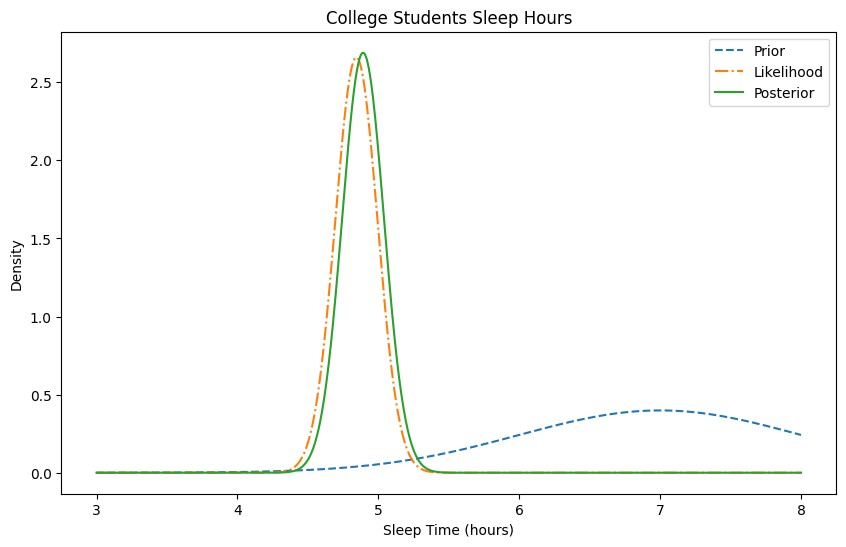

In [7]:
# Define x-axis range
x = np.linspace(3, 8, 1000)

# Prior distribution
prior = norm.pdf(x, mu0, sigma0)

# Likelihood distribution (centered at sample mean)
likelihood = norm.pdf(x, ybar, sigma / np.sqrt(n))

# Posterior distribution
posterior = norm.pdf(x, mu_n, sigma_n)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, prior, label="Prior", linestyle="--")
plt.plot(x, likelihood, label="Likelihood", linestyle="-.")
plt.plot(x, posterior, label="Posterior", linestyle="-")
plt.title("College Students Sleep Hours")
plt.xlabel("Sleep Time (hours)")
plt.ylabel("Density")
plt.legend()
plt.show()



In [9]:
# Create a DataFrame
df = pd.DataFrame({
    "": ["Precision", "SD", "Mean"],
    "Prior": [1 / sigma0**2, sigma0, mu0],
    "Data (Sample Mean)": [n / sigma**2, sigma / np.sqrt(n), ybar],
    "Posterior": [1 / sigma_n**2, sigma_n, mu_n]
})

# Display the DataFrame
print(df.round(3))

              Prior  Data (Sample Mean)  Posterior
0  Precision    1.0              44.444     45.444
1         SD    1.0               0.150      0.148
2       Mean    7.0               4.844      4.892
